# Iris Classification
## Lets Groww More

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Renaming Column names
df=df.rename(columns={'sepal.length ':"sepal_length", 'sepal.width ':"sepal_width", 'petal.length ':"petal_length", 'petal.width ':"petal_width",
       'variety':"species"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
#checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df["species"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

We can see there are no null values in the data and we continue our analysis.

### Visualisation of Iris

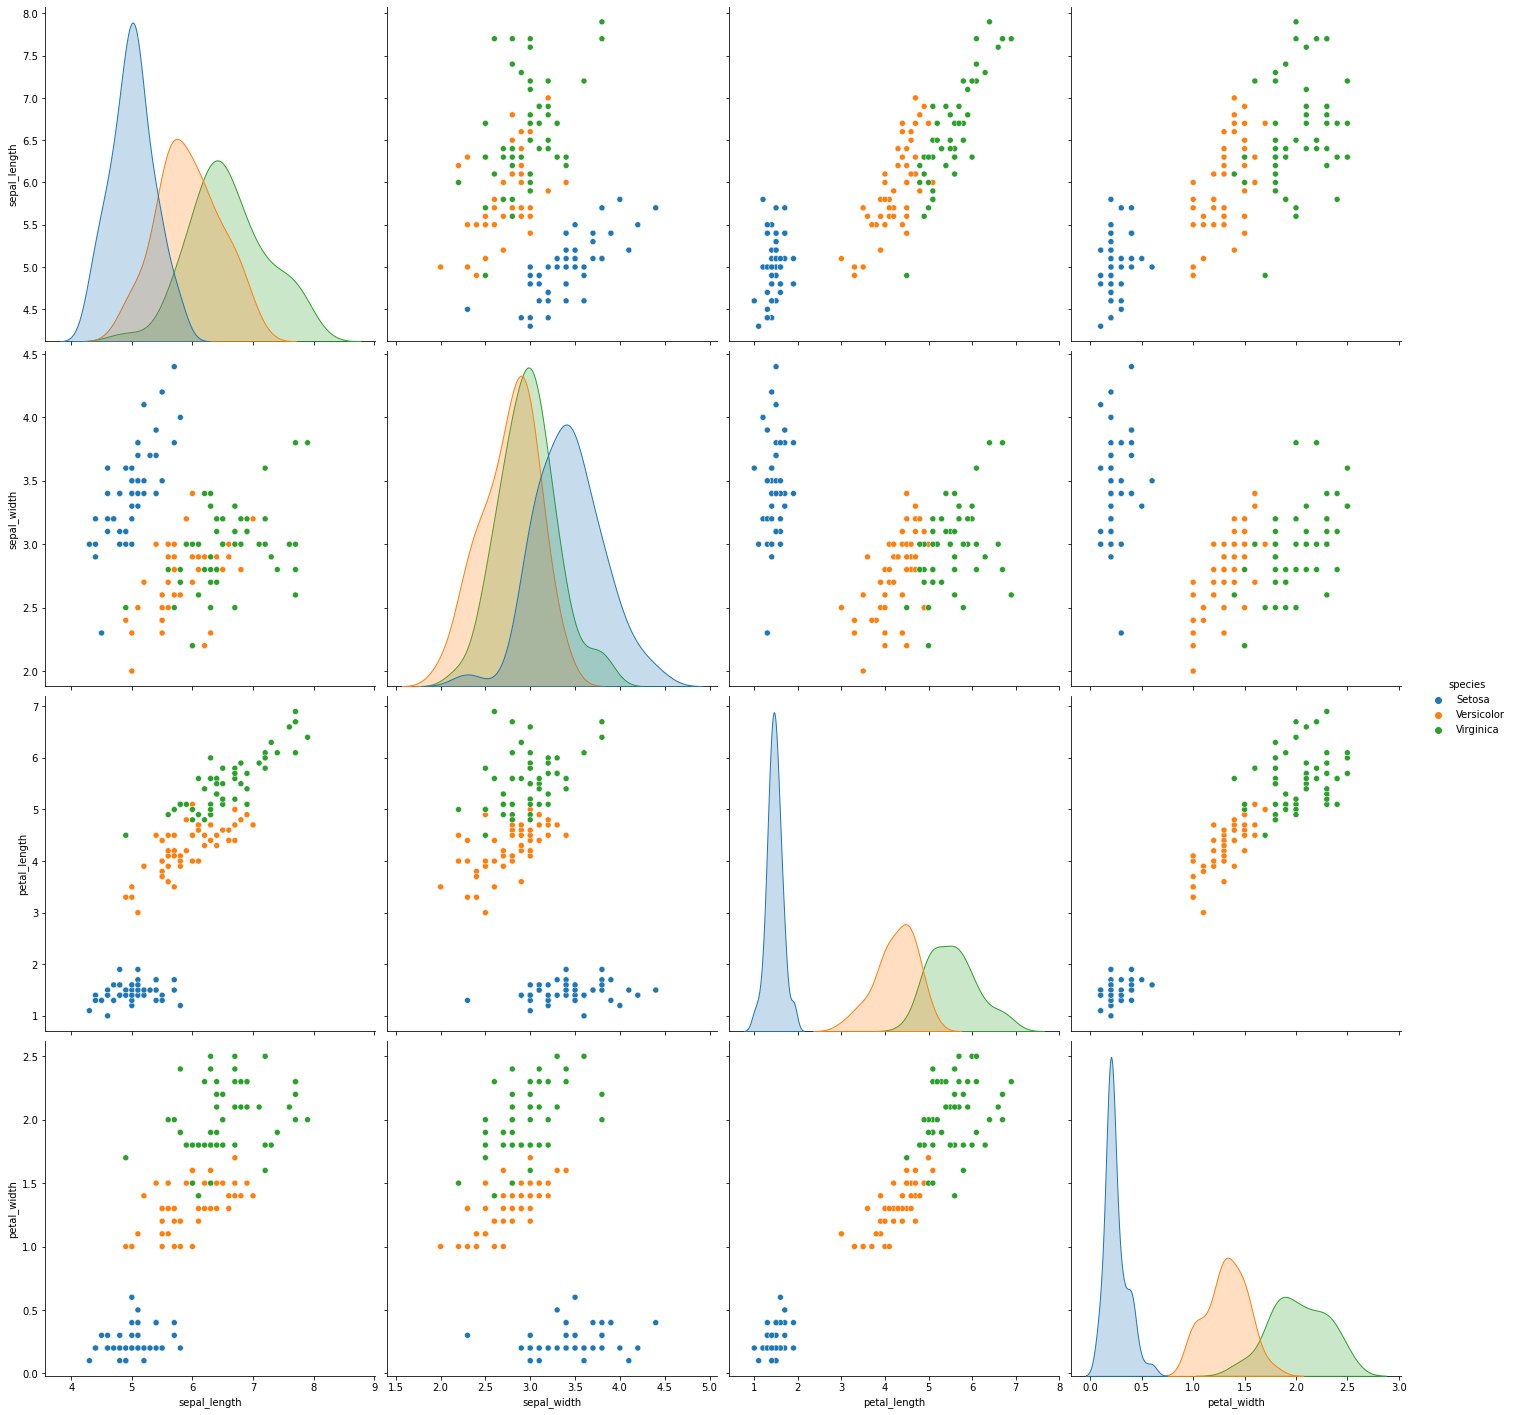

In [6]:
sns.pairplot(df, hue="species", height=5)

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

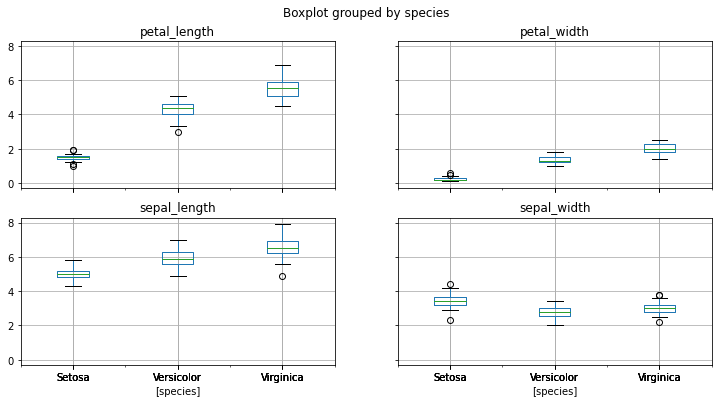

In [7]:
# Boxplots of the Iris Dataset
df.boxplot(by="species", figsize=(12, 6))

### Modeling

#### Spliting data into train and test 

In [8]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:3]
Y = df["species"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=11)

#### Fitting Decision tree to train data and prediction

In [9]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

pred_tree = tree_model.predict(x_test)

### Visualize Decision Tree

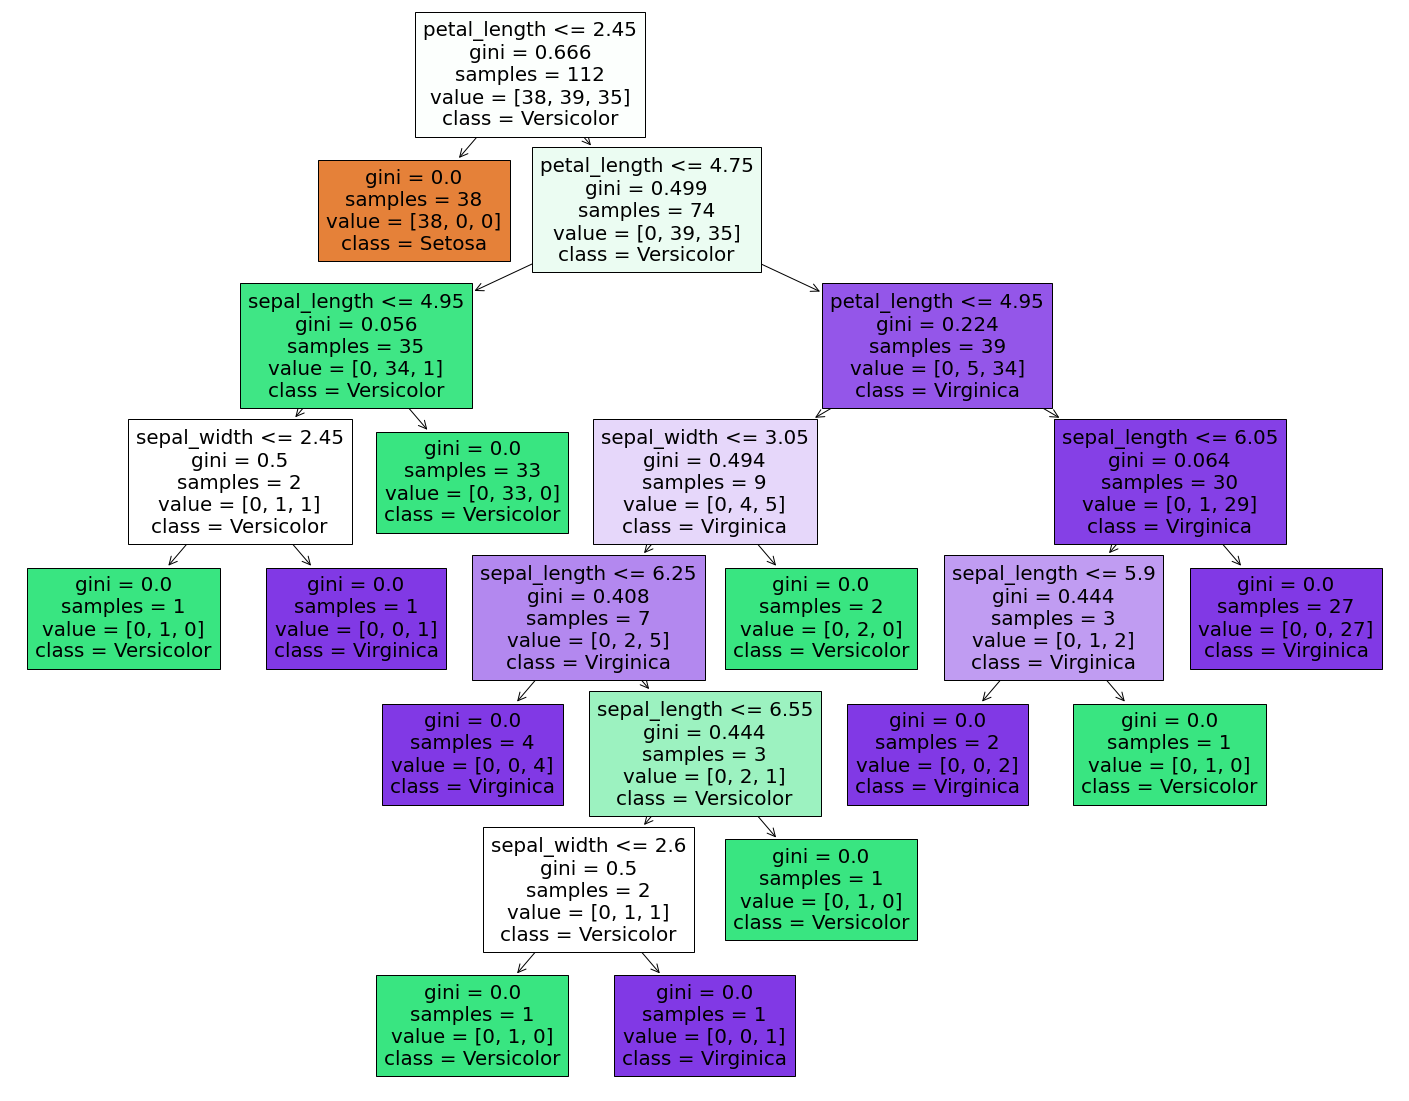

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, 
                   feature_names=['sepal_length', 'sepal_width', 'petal_length'],  
                   class_names=['Setosa', 'Versicolor', 'Virginica'],
                   filled=True)


### Accuracy of the model

In [10]:
from sklearn.metrics import accuracy_score

print("Decision Tree Accuracy :",accuracy_score(y_test,pred_tree))

Decision Tree Accuracy : 0.9473684210526315


### Confusion Matrix

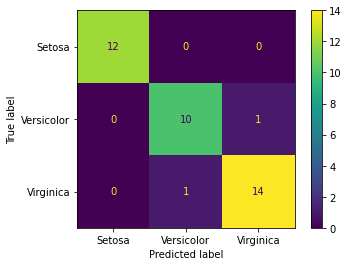

In [11]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_tree,labels=["Setosa",'Versicolor', 'Virginica'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Setosa",'Versicolor', 'Virginica'])
disp.plot()
plt.show()

 Decision has gave an accuracy of 94.7% accuracy